# Exploratory Data Analysis

## Getting Started
### Libraries to Import

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_palette("muted")

### Read in Data

This is a fairly common dataset, here sourced from [data.world](https://data.world/data-society/capital-bikeshare-2011-2012), but also available from the UCI database.

In [2]:
df = pd.read_csv('Data/bike_data.csv')

## Data Cleaning

In [3]:
df.isnull().sum()

Date                   0
Season                 0
Hour                   0
Holiday                0
Day of the Week        0
Working Day            0
Weather Type           0
Temperature F          0
Temperature Feels F    0
Humidity               0
Wind Speed             0
Casual Users           0
Registered Users       0
Total Users            0
dtype: int64

Our date column was an object, so transform to a datetime with pandas and create a new column for Month.

In [4]:
df.Date = pd.to_datetime(arg=df.Date)
df['Month'] = df['Date'].dt.month

In [5]:
df.Date.dtype

dtype('<M8[ns]')

Weather Type:
- 1: Clear, Few clouds, Partly cloudy, Partly cloudy
- 2: Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist
- 3: Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds
- 4: Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog

In [6]:
df.sample(5)

,Date,Season,Hour,Holiday,Day of the Week,Working Day,Weather Type,Temperature F,Temperature Feels F,Humidity,Wind Speed,Casual Users,Registered Users,Total Users,Month
17013,2012-12-16,4,16,0,0,0,2,48.7,50.0,82,7,66,334,400,12
4095,2011-06-24,2,13,0,5,1,1,84.9,87.8,36,15,43,178,221,6
2253,2011-04-08,1,18,0,5,1,3,43.5,39.2,93,17,8,54,62,4
9678,2012-02-13,4,5,0,1,1,1,24.5,17.6,58,9,0,17,17,2
15208,2012-09-30,3,21,0,0,0,1,59.0,60.8,68,0,19,104,123,9


## Data Visualization

### Total Users Per Hour

We see spikes during rush hour (8 am and 5-6 pm) due to business travel, as expected. We see a dropoff in ridership after 8 pm.

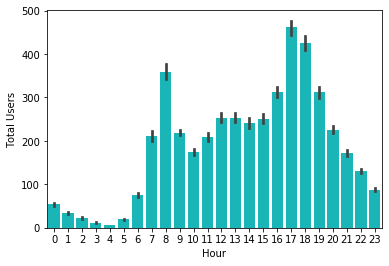

In [19]:
sns.barplot(data=df, x='Hour', y = 'Total Users', color = 'darkturquoise')

In [28]:
df['Temperature F'].describe()

count    17379.000000
mean        58.777507
std         16.620757
min         17.600000
25%         45.200000
50%         59.000000
75%         72.800000
max        102.200000
Name: Temperature F, dtype: float64

### Temperature Distributions

There is an interesting bimodal distribution of actual temperature in Fahrenheit. There are spikes at ~45 and ~70 degrees. We will see how this affects ridership later.

In [31]:
temp_f_range = [df['Temperature F'].min(), df['Temperature F'].max()]
print('The overall range of actual temperatures is: ', temp_f_range)

The overall range of actual temperatures is:  [17.6, 102.2]


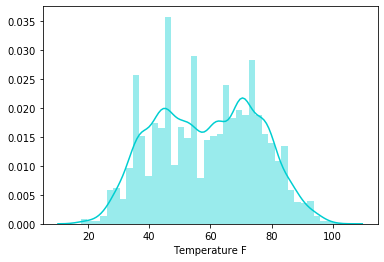

In [20]:
sns.distplot(df['Temperature F'], bins =40, color = 'darkturquoise')

Accounting for humidity/wind, we generate the "Feels Like" temperature which generally created more extremes than the raw temperature. 

In [32]:
temp_feels_f_range = [df['Temperature Feels F'].min(), df['Temperature Feels F'].max()]
print('The overall range of actual temperatures is: ', temp_feels_f_range)

The overall range of actual temperatures is:  [3.2, 122.0]


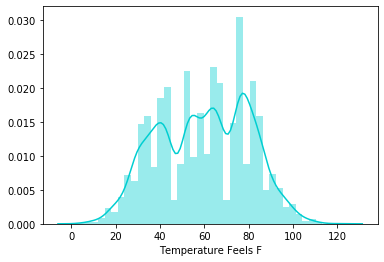

In [21]:
sns.distplot(df['Temperature Feels F'], bins =40, color = 'darkturquoise')

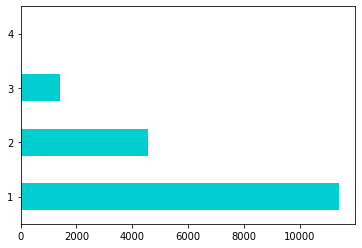

In [22]:
df['Weather Type'].value_counts().plot(kind='barh', color = 'darkturquoise')

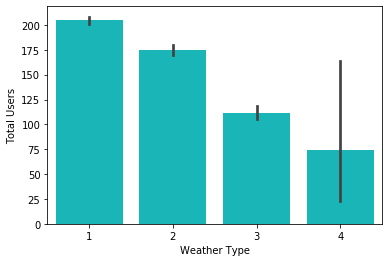

In [23]:
sns.barplot(data=df, x = 'Weather Type', y = 'Total Users', color = 'darkturquoise')

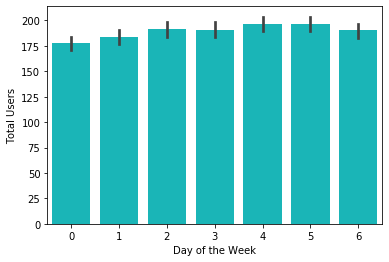

In [24]:
sns.barplot(data=df, x = 'Day of the Week', y = 'Total Users', color = 'darkturquoise')

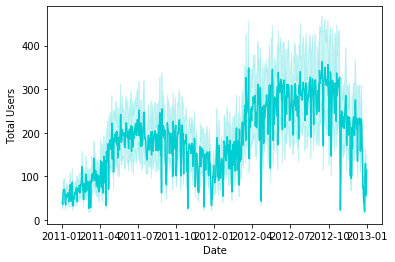

In [25]:
sns.lineplot(x=df.Date, y=df['Total Users'], color = 'darkturquoise')

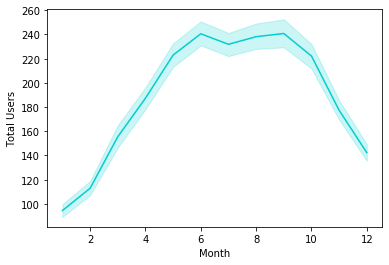

In [26]:
sns.lineplot(x=df.Month, y=df['Total Users'], color = 'darkturquoise')

## Correlations

In [27]:
corr = df.corr()
corr.style.background_gradient(cmap='twilight_shifted').set_precision(2)

,Season,Hour,Holiday,Day of the Week,Working Day,Weather Type,Temperature F,Temperature Feels F,Humidity,Wind Speed,Casual Users,Registered Users,Total Users,Month
Season,1.00,0.00,0.06,-0.00,-0.04,0.04,-0.47,-0.47,0.01,-0.04,-0.23,-0.10,-0.14,0.21
Hour,0.00,1.00,0.00,-0.00,0.00,-0.02,0.14,0.13,-0.28,0.14,0.30,0.37,0.39,-0.01
Holiday,0.06,0.00,1.00,-0.10,-0.25,-0.02,-0.03,-0.03,-0.01,0.00,0.03,-0.05,-0.03,0.02
Day of the Week,-0.00,-0.00,-0.10,1.00,0.04,0.00,-0.00,-0.01,-0.04,0.01,0.03,0.02,0.03,0.01
Working Day,-0.04,0.00,-0.25,0.04,1.00,0.04,0.06,0.05,0.02,-0.01,-0.30,0.13,0.03,-0.00
Weather Type,0.04,-0.02,-0.02,0.00,0.04,1.00,-0.10,-0.11,0.42,0.03,-0.15,-0.12,-0.14,0.01
Temperature F,-0.47,0.14,-0.03,-0.00,0.06,-0.10,1.00,0.99,-0.07,-0.02,0.46,0.34,0.40,0.20
Temperature Feels F,-0.47,0.13,-0.03,-0.01,0.05,-0.11,0.99,1.00,-0.05,-0.06,0.45,0.33,0.40,0.21
Humidity,0.01,-0.28,-0.01,-0.04,0.02,0.42,-0.07,-0.05,1.00,-0.29,-0.35,-0.27,-0.32,0.16
Wind Speed,-0.04,0.14,0.00,0.01,-0.01,0.03,-0.02,-0.06,-0.29,1.00,0.09,0.08,0.09,-0.14


We see some expected correlations, mainly actual temperature versus "feels like" temperature as the latter is a modified version of the former accounting for Humidity. We also see various environmental factors loosely correlated with Season. Finally, in terms of our ridership, we see a positive relationship between temperature and riders as well as hours and riders. 

Our subsets of riders should show strong multicollinearity because Total Users = Casual Users + Registered Users.